<a href="https://colab.research.google.com/github/VivekKejriwal/TheSchoolOfAI/blob/main/Assignment_7/Submission_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf TheSchoolOfAI/
!git clone https://github.com/VivekKejriwal/TheSchoolOfAI
%cd TheSchoolOfAI/models

Cloning into 'TheSchoolOfAI'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 144 (delta 55), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (144/144), 986.48 KiB | 1.14 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/TheSchoolOfAI/models


In [2]:
from data_engine import DataEngine
from train import train
from test import test
import torch
from utils import *
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from model_cifar import Net
from validationplots import plot_misclassified_images, plot_graph



In [3]:
args = ModelConfig()
args.print_config()

print()

init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 128,
  'dropout_value': 0.1,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1,
  'train_transform': None}

CUDA Available


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


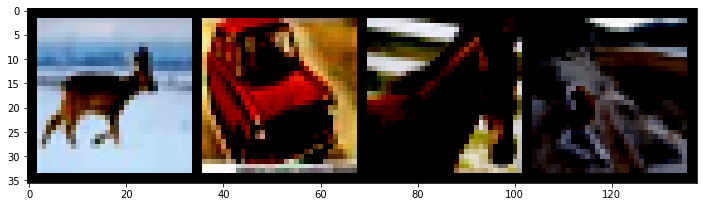

In [4]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [5]:
device = which_device()
model = Net(args).to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3856688737869263 Batch_id=390 Accuracy=42.92: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 5376/10000 (53.76%)

EPOCH: 2


Loss=1.041397213935852 Batch_id=390 Accuracy=57.96: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0085, Accuracy: 6178/10000 (61.78%)

EPOCH: 3


Loss=0.9274118542671204 Batch_id=390 Accuracy=64.33: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 6580/10000 (65.80%)

EPOCH: 4


Loss=0.8146964907646179 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7006/10000 (70.06%)

EPOCH: 5


Loss=0.8155361413955688 Batch_id=390 Accuracy=71.07: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7221/10000 (72.21%)

EPOCH: 6


Loss=0.6869238018989563 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:23<00:00, 16.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7363/10000 (73.63%)

EPOCH: 7


Loss=0.4861931800842285 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [00:23<00:00, 16.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 7536/10000 (75.36%)

EPOCH: 8


Loss=0.5330249071121216 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7638/10000 (76.38%)

EPOCH: 9


Loss=0.8500175476074219 Batch_id=390 Accuracy=77.64: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7656/10000 (76.56%)

EPOCH: 10


Loss=0.8631092309951782 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7828/10000 (78.28%)

EPOCH: 11


Loss=0.4297362267971039 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7817/10000 (78.17%)

EPOCH: 12


Loss=0.6683544516563416 Batch_id=390 Accuracy=80.37: 100%|██████████| 391/391 [00:23<00:00, 16.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7881/10000 (78.81%)

EPOCH: 13


Loss=0.6784769296646118 Batch_id=390 Accuracy=81.00: 100%|██████████| 391/391 [00:24<00:00, 16.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 7941/10000 (79.41%)

EPOCH: 14


Loss=0.5273734331130981 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:24<00:00, 16.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 7948/10000 (79.48%)

EPOCH: 15


Loss=0.5126727819442749 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 8044/10000 (80.44%)

EPOCH: 16


Loss=0.5989525318145752 Batch_id=390 Accuracy=83.06: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 8029/10000 (80.29%)

EPOCH: 17


Loss=0.5757477879524231 Batch_id=390 Accuracy=83.57: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8112/10000 (81.12%)

EPOCH: 18


Loss=0.5070157051086426 Batch_id=390 Accuracy=83.99: 100%|██████████| 391/391 [00:24<00:00, 16.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8119/10000 (81.19%)

EPOCH: 19


Loss=0.38005656003952026 Batch_id=390 Accuracy=84.47: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8147/10000 (81.47%)

EPOCH: 20


Loss=0.4084304869174957 Batch_id=390 Accuracy=84.92: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8118/10000 (81.18%)

EPOCH: 21


Loss=0.23892717063426971 Batch_id=390 Accuracy=85.53: 100%|██████████| 391/391 [00:24<00:00, 16.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8153/10000 (81.53%)

EPOCH: 22


Loss=0.3118899166584015 Batch_id=390 Accuracy=85.66: 100%|██████████| 391/391 [00:23<00:00, 16.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8180/10000 (81.80%)

EPOCH: 23


Loss=0.47905057668685913 Batch_id=390 Accuracy=86.03: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8244/10000 (82.44%)

EPOCH: 24


Loss=0.39946189522743225 Batch_id=390 Accuracy=86.63: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8253/10000 (82.53%)

EPOCH: 25


Loss=0.5176063776016235 Batch_id=390 Accuracy=86.89: 100%|██████████| 391/391 [00:23<00:00, 16.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8221/10000 (82.21%)

EPOCH: 26


Loss=0.3946250379085541 Batch_id=390 Accuracy=86.89: 100%|██████████| 391/391 [00:24<00:00, 15.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8272/10000 (82.72%)

EPOCH: 27


Loss=0.37384459376335144 Batch_id=390 Accuracy=87.33: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8217/10000 (82.17%)

EPOCH: 28


Loss=0.3229319453239441 Batch_id=390 Accuracy=87.70: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8298/10000 (82.98%)

EPOCH: 29


Loss=0.3001174330711365 Batch_id=390 Accuracy=88.00: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8247/10000 (82.47%)

EPOCH: 30


Loss=0.44541794061660767 Batch_id=390 Accuracy=88.27: 100%|██████████| 391/391 [00:23<00:00, 16.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8300/10000 (83.00%)

EPOCH: 31


Loss=0.4630362391471863 Batch_id=390 Accuracy=88.68: 100%|██████████| 391/391 [00:24<00:00, 15.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8300/10000 (83.00%)

EPOCH: 32


Loss=0.37595149874687195 Batch_id=390 Accuracy=88.79: 100%|██████████| 391/391 [00:24<00:00, 16.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8278/10000 (82.78%)

EPOCH: 33


Loss=0.31398627161979675 Batch_id=390 Accuracy=88.94: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8285/10000 (82.85%)

EPOCH: 34


Loss=0.32835453748703003 Batch_id=390 Accuracy=89.33: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8331/10000 (83.31%)

EPOCH: 35


Loss=0.2560018002986908 Batch_id=390 Accuracy=89.52: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8382/10000 (83.82%)

EPOCH: 36


Loss=0.1602417528629303 Batch_id=390 Accuracy=89.63: 100%|██████████| 391/391 [00:23<00:00, 16.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8347/10000 (83.47%)

EPOCH: 37


Loss=0.2885192632675171 Batch_id=390 Accuracy=90.01: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8336/10000 (83.36%)

EPOCH: 38


Loss=0.3328331410884857 Batch_id=390 Accuracy=90.16: 100%|██████████| 391/391 [00:23<00:00, 16.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8293/10000 (82.93%)

EPOCH: 39


Loss=0.29831042885780334 Batch_id=390 Accuracy=90.02: 100%|██████████| 391/391 [00:23<00:00, 16.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8369/10000 (83.69%)

EPOCH: 40


Loss=0.3478381037712097 Batch_id=390 Accuracy=90.58: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8297/10000 (82.97%)

EPOCH: 41


Loss=0.18574149906635284 Batch_id=390 Accuracy=90.52: 100%|██████████| 391/391 [00:23<00:00, 16.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8359/10000 (83.59%)

EPOCH: 42


Loss=0.29663628339767456 Batch_id=390 Accuracy=90.76: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8281/10000 (82.81%)

EPOCH: 43


Loss=0.3283621668815613 Batch_id=390 Accuracy=91.05: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8349/10000 (83.49%)

EPOCH: 44


Loss=0.24031302332878113 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8406/10000 (84.06%)

EPOCH: 45


Loss=0.21810951828956604 Batch_id=390 Accuracy=91.24: 100%|██████████| 391/391 [00:24<00:00, 16.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8418/10000 (84.18%)

EPOCH: 46


Loss=0.16895949840545654 Batch_id=390 Accuracy=91.49: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8374/10000 (83.74%)

EPOCH: 47


Loss=0.30260974168777466 Batch_id=390 Accuracy=91.63: 100%|██████████| 391/391 [00:24<00:00, 15.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8378/10000 (83.78%)

EPOCH: 48


Loss=0.40036195516586304 Batch_id=390 Accuracy=91.85: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8457/10000 (84.57%)

EPOCH: 49


Loss=0.27803459763526917 Batch_id=390 Accuracy=91.79: 100%|██████████| 391/391 [00:25<00:00, 15.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8374/10000 (83.74%)

EPOCH: 50


Loss=0.3382165729999542 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
/content/TheSchoolOfAI/models/test.py:23: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]


Test set: Average loss: 0.0040, Accuracy: 8414/10000 (84.14%)



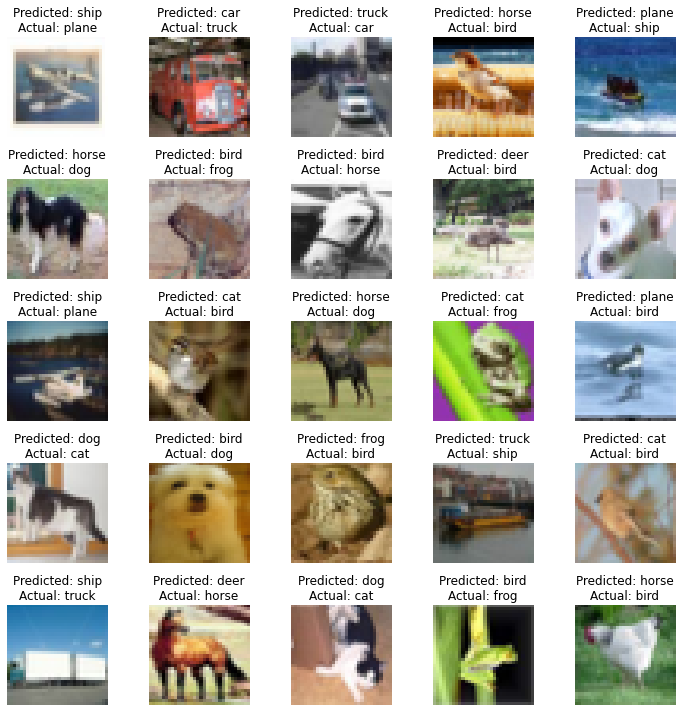

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')


plot_misclassified_images(misclassified_imgs, classes, "misclassified_images.png")



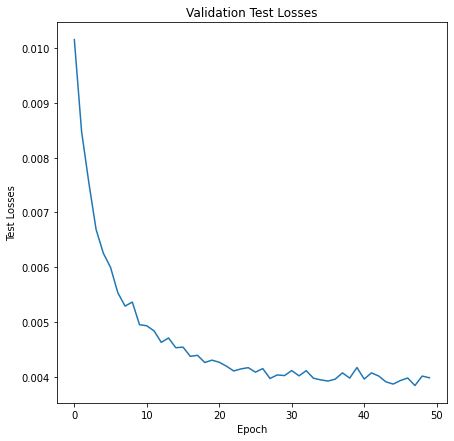

In [9]:
plot_graph(test_losses, "Test Losses")

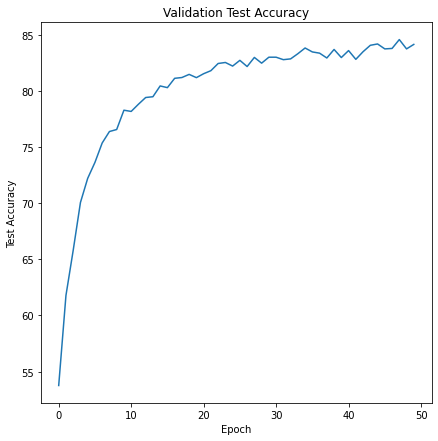

In [10]:
plot_graph(test_accs, "Test Accuracy")